<a href="https://www.kaggle.com/code/sagorkumarmitra/task-1-creating-a-neural-network-mnist?scriptVersionId=150773918" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import Library & Dataset

**Initially we have to import Numpy, Pandas, Matplotlib and MNIST dataset. We will import MNIST from TensorFlow dataset because it’s easy and faster. Mention that, we also can import the dataset from official website and Kaggle.We will make two sets; one is training set and other is test set**

In [1]:
import pandas as pd
import numpy as np

In [2]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


##  Visualizing the Image Data

**We will explore the dataset before heading to the data preprocessing unit.**

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

**The training set contains 60,000 and the test set contains 10,000 images with 28 by 28 pixels.**

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

**We will consider the first image from training set and explore the characteristis of the given image.**

In [6]:
single_image = x_train[0]

In [7]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
single_image.shape

(28, 28)

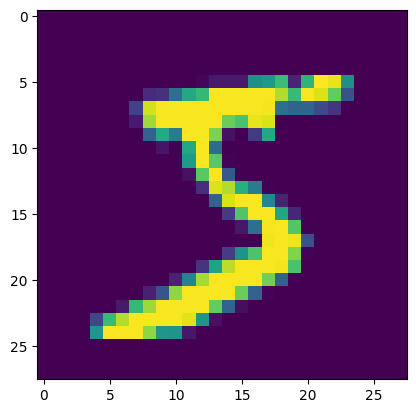

In [9]:
plt.imshow(single_image)

# PreProcessing

**We have ten classes so we will use one hot encoding to make it into categorical data to to feed in CNN.**

In [10]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [11]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [12]:
from tensorflow.keras.utils import to_categorical

In [13]:
y_train.shape

(60000,)

**Converting the test data into categorical data**

In [14]:
y_example = to_categorical(y_train)

In [15]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [16]:
y_example.shape

(60000, 10)

In [17]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [18]:
y_cat_test = to_categorical(y_test,10)

In [19]:
y_cat_train = to_categorical(y_train,10)

# Processing X Data

**We have to normalize the X data in between 0 and 1 by dividing 255**

In [20]:
single_image.max()

255

In [21]:
single_image.min()

0

In [22]:
x_train = x_train/255
x_test = x_test/255

In [23]:
scaled_single = x_train[0]

In [24]:
scaled_single.max()

1.0

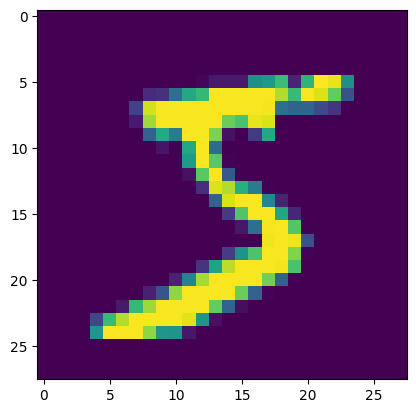

In [25]:
plt.imshow(scaled_single)

# Reshaping the Data

**The dataset consists of 60,000 images with dimension of 28 by 28 pixel. We need to add one more dimension because RGB channel demands 3 dimensions.**

In [26]:
x_train.shape

(60000, 28, 28)

In [27]:
x_test.shape

(10000, 28, 28)

**Reshape to include channel dimension (in this case, 1 channel)**

In [28]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [29]:
x_train.shape

(60000, 28, 28, 1)

In [30]:
x_test = x_test.reshape(10000,28,28,1)

In [31]:
x_test.shape

(10000, 28, 28, 1)

# Training the Model

**We are heading toward the TensorFlow and Keras to train our model with 5 convolution layers.**

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [33]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))

# KERAS METRICS FOR REPORT GENERATION
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591786 (2.26 MB)
Trainable params: 591786 (2.26 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

**We are going to use Early Stops with patients 2 to avoid unnecessary training time.**

In [35]:
from tensorflow.keras.callbacks import EarlyStopping

In [36]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

# Train the Model

**It's time to train our model. There we choose 10 epochs.**

In [37]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1357 - accuracy: 0.9593 - val_loss: 0.0533 - val_accuracy: 0.9831
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0468 - accuracy: 0.9854 - val_loss: 0.0438 - val_accuracy: 0.9861
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0294 - accuracy: 0.9910 - val_loss: 0.0394 - val_accuracy: 0.9879
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0192 - accuracy: 0.9938 - val_loss: 0.0459 - val_accuracy: 0.9852
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0140 - accuracy: 0.9955 - val_loss: 0.0478 - val_accuracy: 0.9866


# Evaluate the Model

**In this section we are going to generate Loss and Accuracy reports to evaluate our model performence.**

In [38]:
model.metrics_names

['loss', 'accuracy']

In [39]:
losses = pd.DataFrame(model.history.history)

In [40]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.135659,0.959267,0.053331,0.9831
1,0.046805,0.985433,0.043827,0.9861
2,0.029355,0.991017,0.039404,0.9879
3,0.019155,0.993800,0.045900,0.9852
4,0.013976,0.995533,0.047820,0.9866


<Axes: >

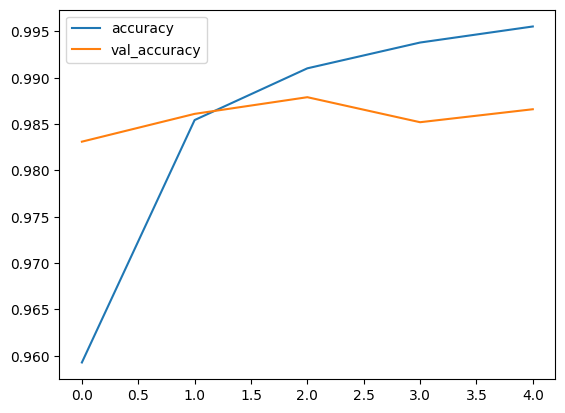

In [41]:
losses[['accuracy','val_accuracy']].plot()

<Axes: >

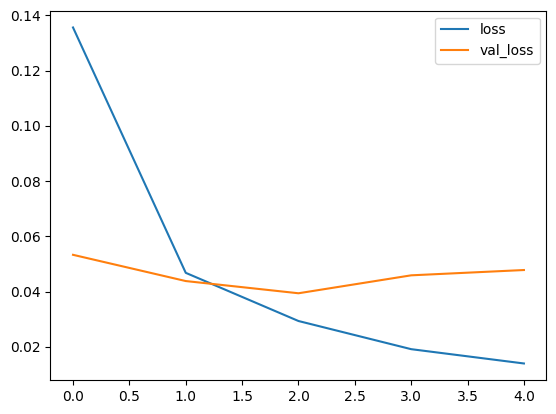

In [42]:
losses[['loss','val_loss']].plot()

In [43]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[0.0478203147649765, 0.9865999817848206]


In [44]:
from sklearn.metrics import classification_report,confusion_matrix

In [45]:
predict_x=model.predict(x_test) 
predictions=np.argmax(predict_x,axis=1)

313/313 [==============================] - 1s 4ms/step


In [46]:
y_cat_test.shape

(10000, 10)

In [47]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [48]:
predictions[0]

7

In [49]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

# Classification Report

**we are going to generate the classification report to evaluate our model performance.**

In [50]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.98      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       0.96      0.99      0.98       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.97      0.98       974
           9       1.00      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



# Confusion Matrix

**Let's figure out confusion matrix.**

In [51]:
confusion_matrix(y_test,predictions)

array([[ 964,    1,    1,    1,    1,    0,   11,    0,    1,    0],
       [   0, 1133,    0,    0,    0,    0,    2,    0,    0,    0],
       [   0,    2, 1023,    0,    0,    0,    2,    3,    2,    0],
       [   0,    1,    3,  992,    0,    8,    1,    2,    3,    0],
       [   0,    0,    0,    0,  977,    0,    2,    0,    0,    3],
       [   1,    1,    0,    2,    0,  880,    8,    0,    0,    0],
       [   1,    2,    0,    0,    1,    1,  953,    0,    0,    0],
       [   1,    2,    6,    0,    0,    0,    0, 1018,    1,    0],
       [   0,    1,    3,    0,    0,    2,   16,    3,  948,    1],
       [   1,    3,    0,    2,    7,    7,    0,    7,    4,  978]])

# Heatmap Generation

**Let's explore what heatmap says about our model.**

In [52]:
import seaborn as sns

<Axes: >

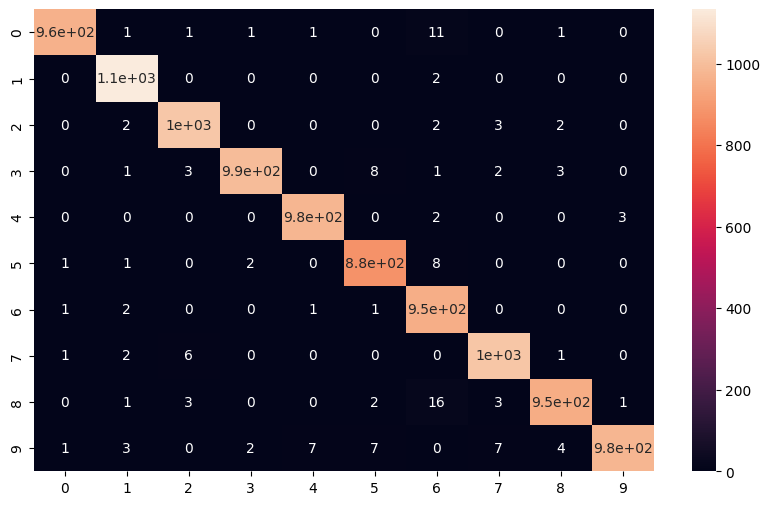

In [53]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

# Predicting a Random Image

**Finally, we choose a random image and try to predict using our model to see  how much capable it is to predict it correctly.**

In [54]:
my_number = x_test[0]

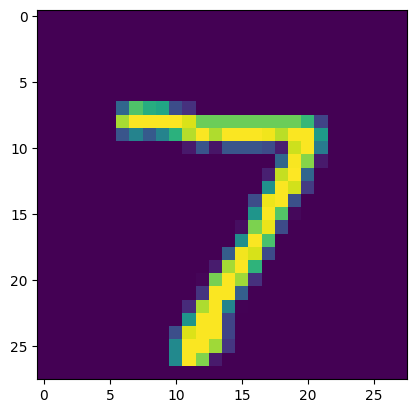

In [55]:
plt.imshow(my_number.reshape(28,28))

In [56]:
predict_x=model.predict(my_number.reshape(1,28,28,1))
classes_x=np.argmax(predict_x,axis=1)

1/1 [==============================] - 0s 18ms/step


In [57]:
classes_x

array([7])

**It seems that our CNN model predicts it pretty well.**